In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)-english'
MODEL_NAME = 'bert-base-multilingual-uncased'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['english_text'].values
val_texts = val_df['english_text'].values
test_texts = test_df['english_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

Me an my nigga attitude soooooo bad but he always cave first cus he kno I stand on business literally 😂🤣 1
@khawarkhatana @ashoswai look at you with your hatred and jealousy you little Islamophobic POS, millions of Hindus live in Muslim nations, Jews have lived in peace with Muslims historically, even today they are welcome in many Muslim and Arab countries, this is not about religion, we are the same… https://t.co/NvrFlxZucP 1
@dartwalker @GraniteElements You must!
I dug this one out at Christmas - it had been in my sewing bag untouched for years 0
@EstherMcVey1 We look forward to hearing their response (to whatever question they will imagine you asked) 0
This is so amazing.  I am impressed with this project, hopefully with this event the community and especially this coin will achieve success., https://t.co/wB5RQb0EYJ 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

me an my nigga attitude soooooo bad but he always cave first cus he kno i stand on business literally 😂🤣 1
khawarkhatana ashoswai look at you with your hatred and jealousy you little islamophobic pos millions of hindus live in muslim nations jews have lived in peace with muslims historically even today they are welcome in many muslim and arab countries this is not about religion we are the same… 1
dartwalker graniteelements you must i dug this one out at christmas it had been in my sewing bag untouched for years 0
esthermcvey1 we look forward to hearing their response to whatever question they will imagine you asked 0
this is so amazing i am impressed with this project hopefully with this event the community and especially this coin will achieve success 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import BertTokenizer, BertForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)
print(model)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 478/478 [02:41<00:00,  2.97it/s, loss=0.0875] 


Train loss 0.11222603642401212 accuracy 0.9574544622126296
Validation loss 0.06324163723038509 accuracy 0.9742960855489061
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.9742960855489061
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 478/478 [02:39<00:00,  3.00it/s, loss=0.0607] 


Train loss 0.053374264110659084 accuracy 0.9805749043461199
Validation loss 0.05366818729962688 accuracy 0.979740998724615
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.979740998724615
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 478/478 [02:39<00:00,  3.00it/s, loss=0.0386] 


Train loss 0.03808022232698939 accuracy 0.9863468393341837
Validation loss 0.0580192556779366 accuracy 0.9799862650838811
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.9799862650838811
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 478/478 [02:41<00:00,  2.96it/s, loss=0.0114]  


Train loss 0.030629858093542753 accuracy 0.9892573334641421
Validation loss 0.07182222137489588 accuracy 0.9785146669282841
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 478/478 [02:39<00:00,  2.99it/s, loss=0.00657] 


Train loss 0.02343527450448849 accuracy 0.9914810817881553
Validation loss 0.07953862297654268 accuracy 0.9792014127342294
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 478/478 [02:39<00:00,  2.99it/s, loss=0.0171]  


Train loss 0.018767879460207634 accuracy 0.9936557768403153
Validation loss 0.07988301995355869 accuracy 0.9783184538408712
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 478/478 [02:39<00:00,  3.00it/s, loss=0.0436]  


Train loss 0.01593059689653711 accuracy 0.9946204911867622
Validation loss 0.0719449456089933 accuracy 0.9789561463749632
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 478/478 [02:39<00:00,  2.99it/s, loss=0.0119]  


Train loss 0.012216916724363152 accuracy 0.995912227345564
Validation loss 0.08528847887937445 accuracy 0.9766506425978613
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


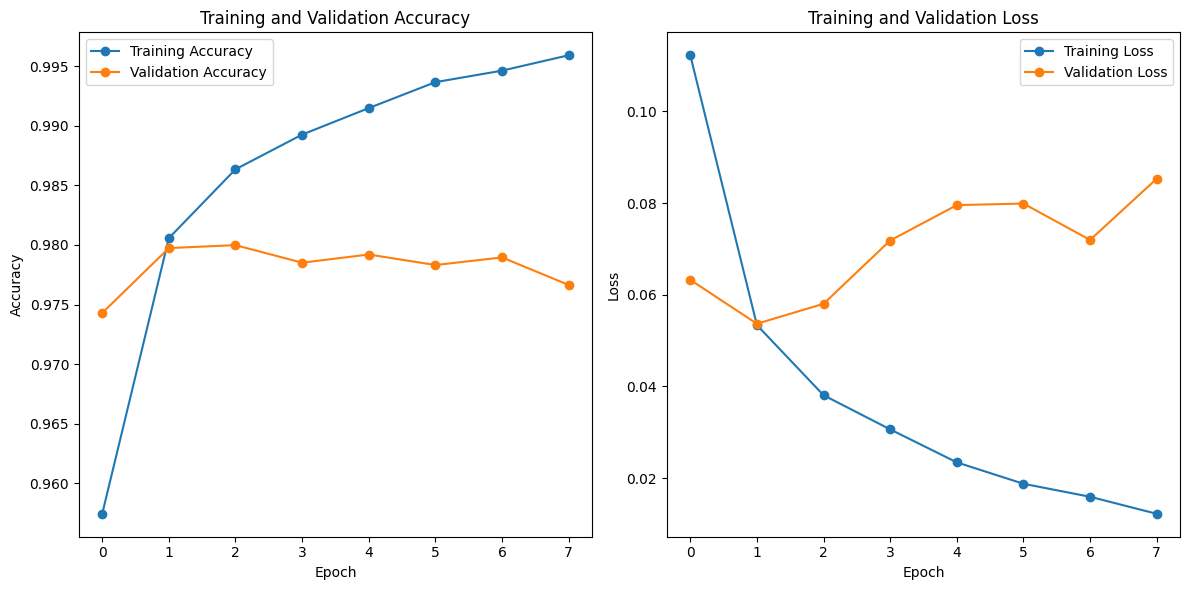

In [9]:
hlp.plot_history(history)

In [10]:
import os
import torch
from transformers import BertTokenizer, BertForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'../saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained(f'{path}/tokenizer')
model = BertForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

In [11]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.9798891450434101 Test Loss: 0.06000079268414993


Accuracy: 0.98
F1 Score: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.98      0.98      0.98     10173
        Hate       0.98      0.98      0.98     10214

    accuracy                           0.98     20387
   macro avg       0.98      0.98      0.98     20387
weighted avg       0.98      0.98      0.98     20387



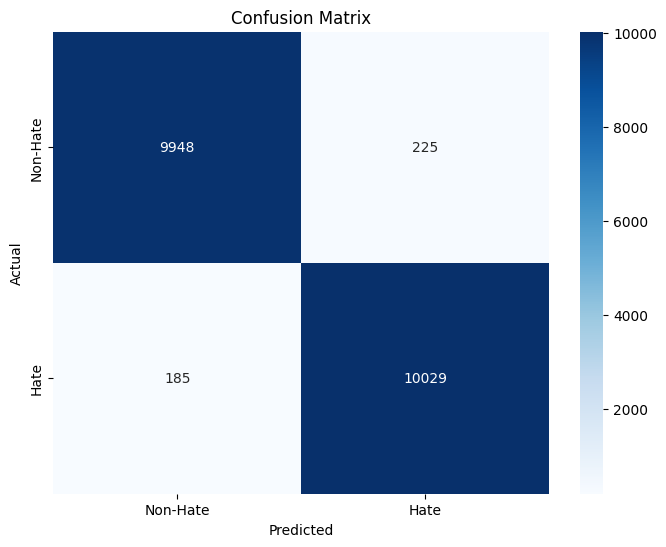

In [12]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [13]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.67
